In [2]:
import SimpleITK as sitk
import numpy as np
import csv
from glob import glob
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

## Image extraction

In [8]:
from pydicom import dcmread

file_path = r"D:\Code\Python Code\CT552\LUNA16\manifest-1733045438053\LIDC-IDRI\LIDC-IDRI-0001\01-01-2000-NA-NA-30178\3000566.000000-NA-03192\1-043.dcm"
ds = dcmread(file_path)

In [4]:
ds.SeriesInstanceUID

'1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192'

In [3]:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.297813206491522913194774892711
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.29781

In [9]:
pixel_array = ds.pixel_array
print(pixel_array)

[[-1024 -1024 -1024 ... -1024 -1024 -1024]
 [-1024 -1024 -1024 ... -1024 -1024 -1024]
 [-1024 -1024 -1024 ... -1024 -1024 -1024]
 ...
 [-1024 -1024 -1024 ... -1024 -1024 -1024]
 [-1024 -1024 -1024 ... -1024 -1024 -1024]
 [-1024 -1024 -1024 ... -1024 -1024 -1024]]


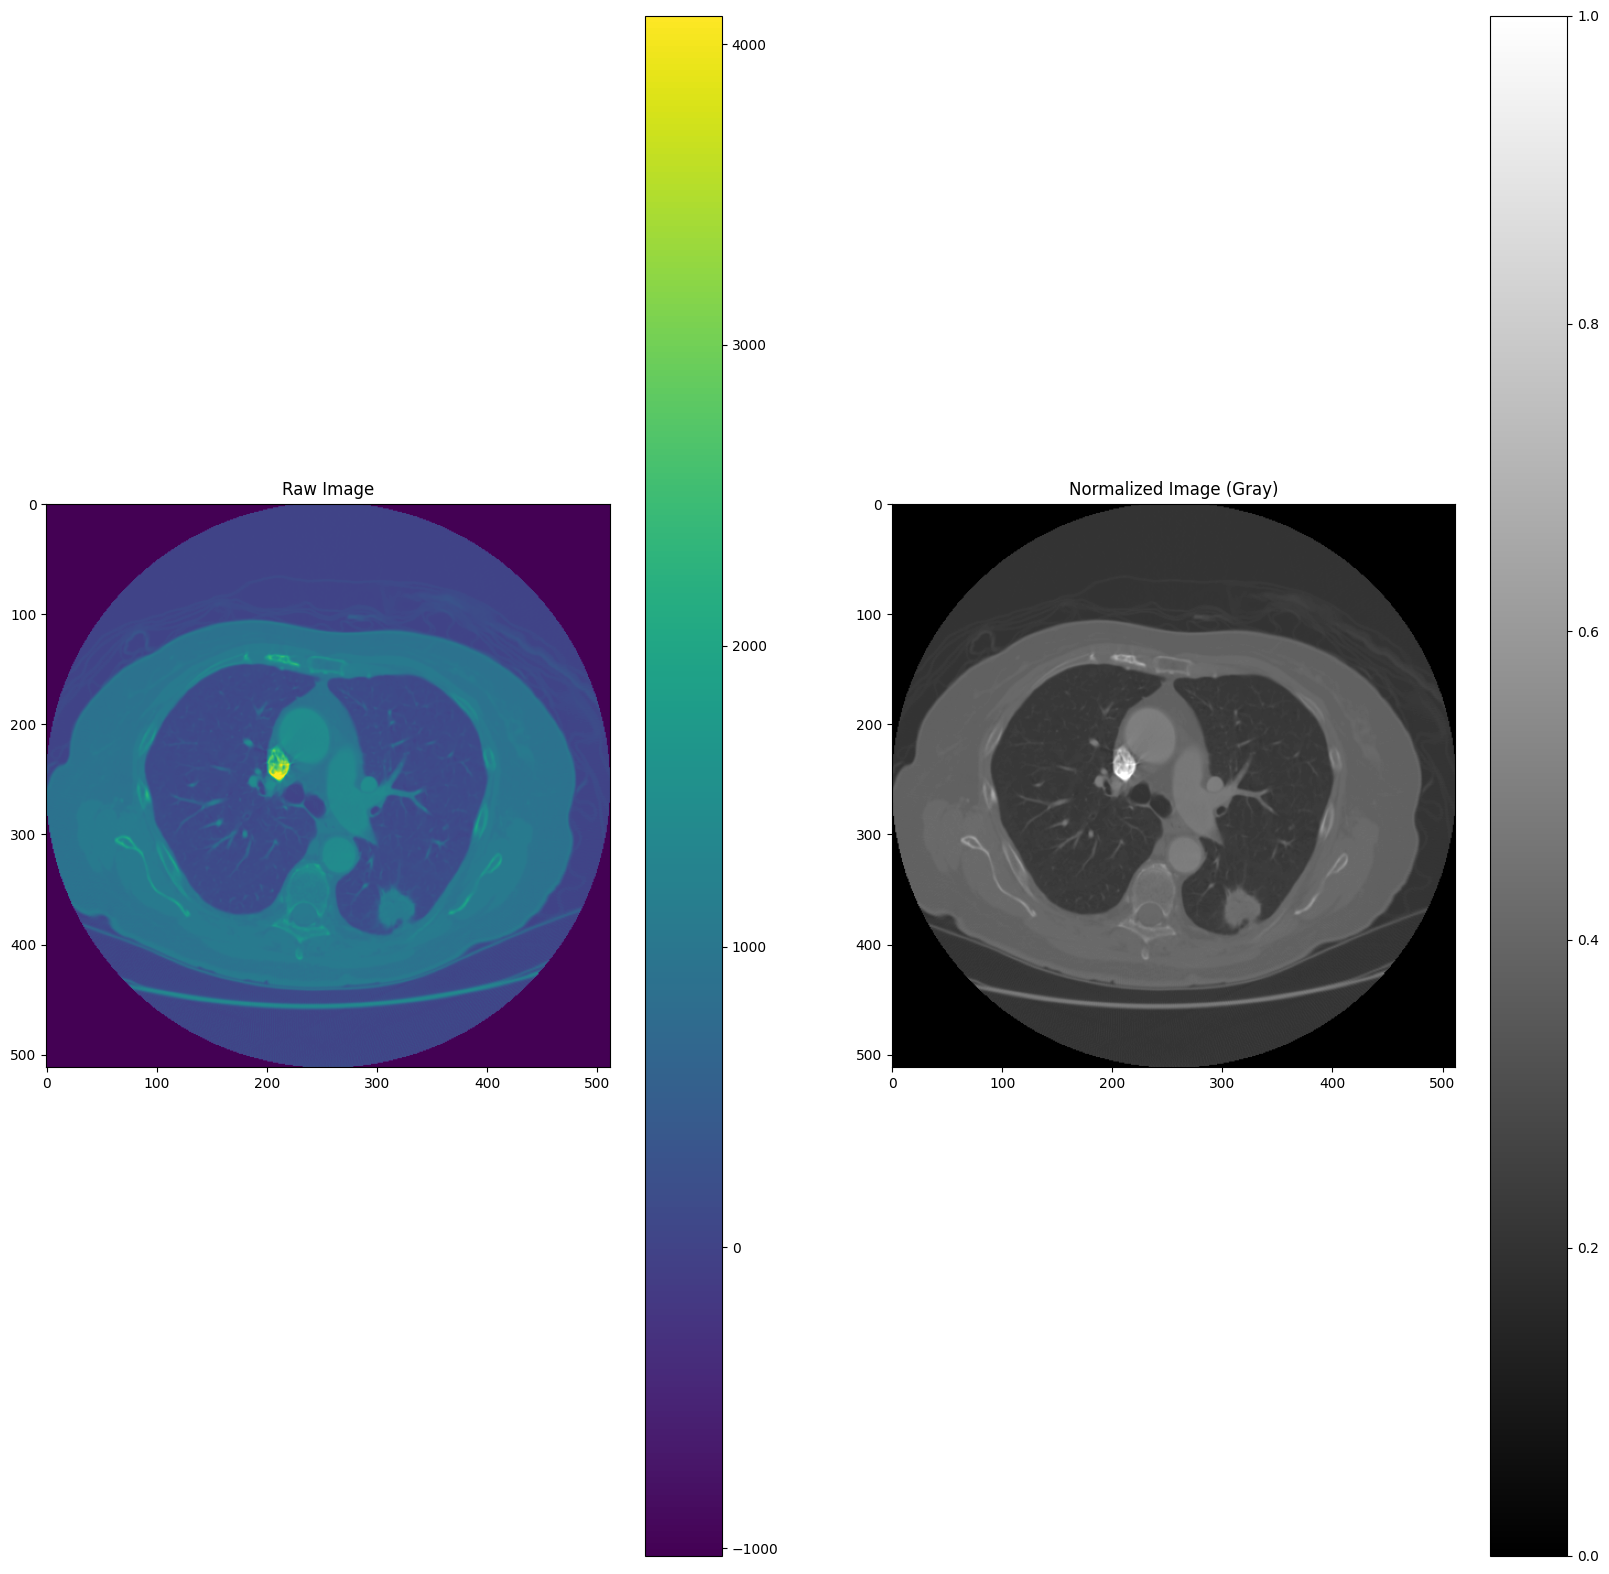

In [21]:
def normalize(image):
    MIN_BOUND = -1000.0
    MAX_BOUND = 4000.0
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image > 1] = 1.  # Clamp values above 1 to 1
    image[image < 0] = 0.  # Clamp values below 0 to 0
    return image

fig, ax = plt.subplots(1, 2, figsize=[20, 20])

# Display the raw image on the left subplot
im0 = ax[0].imshow(pixel_array)
ax[0].set_title('Raw Image')
fig.colorbar(im0, ax=ax[0], orientation='vertical')  # Color bar for the raw image

# Display the normalized image on the right subplot with grayscale colormap
im1 = ax[1].imshow(normalize(pixel_array), cmap='gray')
ax[1].set_title('Normalized Image (Gray)')
fig.colorbar(im1, ax=ax[1], orientation='vertical')  # Color bar for the normalized image

plt.show()

In [ ]:
import os

# Lấy danh sách tên tệp từ thư mục
a = os.listdir(r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images")

# Tạo một dictionary để lưu các cặp (phần đầu tiên, phần thứ hai) và đếm số lần xuất hiện của chúng
seen = {}

# Duyệt qua 10 tệp đầu tiên trong danh sách
for i in range(len(a)):
    # Tách tên tệp bằng dấu gạch dưới "_"
    parts = a[i].split("_")
    
    # Lấy phần đầu tiên và thứ hai
    first_two_parts = (parts[0], parts[1])
    print(first_two_parts)

    # Kiểm tra xem cặp phần đầu tiên và thứ hai đã xuất hiện chưa
    if first_two_parts in seen:
        seen[first_two_parts].append(a[i])  # Nếu có thì thêm tên tệp vào danh sách trùng
    else:
        seen[first_two_parts] = [a[i]]  # Nếu chưa có thì khởi tạo danh sách mới

# In ra những cặp trùng lặp
for key, files in seen.items():
    if len(files) > 1:  # Nếu có nhiều hơn 1 tệp trùng nhau
        print(f"Các tệp trùng nhau với phần đầu tiên và thứ hai {key}: {files}")


In [2]:
itk_img = sitk.ReadImage("./LUNA16/test/1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249.mhd")
img_array = sitk.GetArrayFromImage(itk_img)

In [3]:
print(img_array[0].shape)

(512, 512)


In [11]:
print(img_array[0])

[[-2048 -2048 -2048 ... -2048 -2048 -2048]
 [-2048 -2048 -2048 ... -2048 -2048 -2048]
 [-2048 -2048 -2048 ... -2048 -2048 -2048]
 ...
 [-2048 -2048 -2048 ... -2048 -2048 -2048]
 [-2048 -2048 -2048 ... -2048 -2048 -2048]
 [-2048 -2048 -2048 ... -2048 -2048 -2048]]


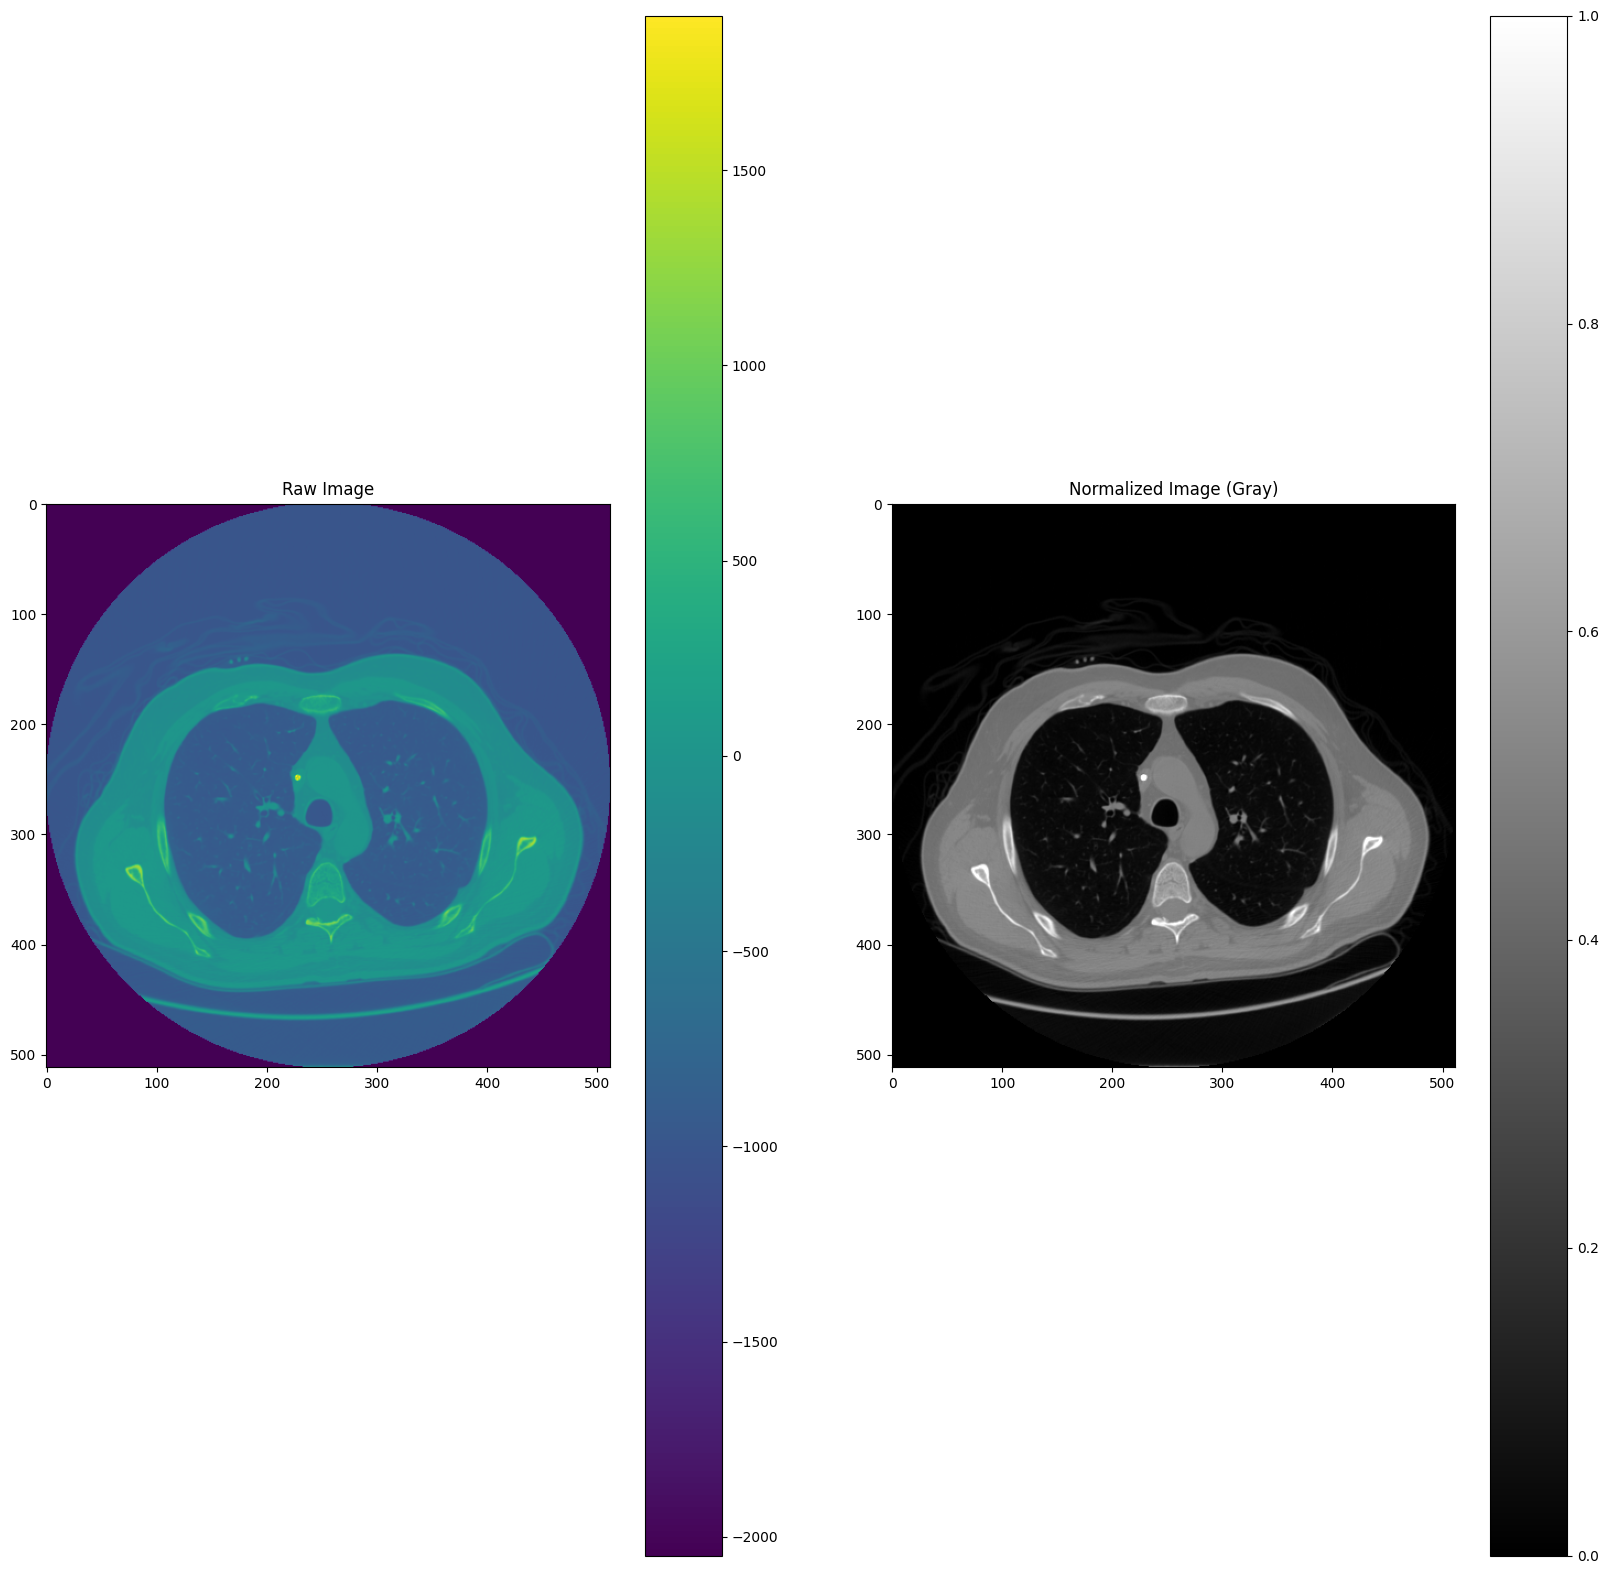

In [9]:
def normalize(image):
    MIN_BOUND = -1000.0
    MAX_BOUND = 1000.0
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image > 1] = 1.  # Clamp values above 1 to 1
    image[image < 0] = 0.  # Clamp values below 0 to 0
    return image

fig, ax = plt.subplots(1, 2, figsize=[20, 20])

# Display the raw image on the left subplot
im0 = ax[0].imshow(img_array[100])
ax[0].set_title('Raw Image')
fig.colorbar(im0, ax=ax[0], orientation='vertical')  # Color bar for the raw image

# Display the normalized image on the right subplot with grayscale colormap
im1 = ax[1].imshow(normalize(img_array[100]), cmap='gray')
ax[1].set_title('Normalized Image (Gray)')
fig.colorbar(im1, ax=ax[1], orientation='vertical')  # Color bar for the normalized image

plt.show()

In [4]:
x_world, y_world, z_world, diam = 105.0557924, 19.82526014, -91.24725078, 21.08961863
origin = itk_img.GetOrigin()
spacing = itk_img.GetSpacing()
print(origin, spacing)

(-199.3, -220.0, -394.5) (0.859375, 0.859375, 2.5)


In [8]:
center = np.array([x_world, y_world, z_world])
v_center = np.rint((center-origin)/spacing)
print((center-origin))

[304.3557924  239.82526014 303.25274922]


In [23]:
x, y, z = -88.49125714, 4.69078919, -184.9336769
origin = (186.199997, 130.199997, -399.5)
spacing = (0.7617189884185791, 0.7617189884185791, 1.25)
center = np.array([x, y, z])
v_center = np.rint(abs(center-origin)/spacing)
print(v_center)
diam = 18.50978255
v_diam = int(diam/spacing[1])
print(int(v_center[0]-v_diam/2) - 2)
print(int(v_center[0]+v_diam/2) + 2)
print(int(v_center[1]-v_diam/2) - 2)
print(int(v_center[1]+v_diam/2) + 2)

[361. 165. 172.]
347
375
151
179


In [24]:
file1 = pd.read_csv(r'D:\Code\Python Code\CT552\output.csv')
file2 = pd.read_csv(r'D:\Code\Python Code\CT552\LUNA16\subset1_extracted\output.csv')
# Lấy giao của hai file dựa trên tất cả các cột
common_rows = pd.merge(file1, file2, how='inner')

# Lưu kết quả vào một file CSV mới
common_rows.to_csv('common_rows.csv', index=False)

print("Các dòng chung đã được lưu vào 'common_rows.csv'")

Các dòng chung đã được lưu vào 'common_rows.csv'


In [17]:
v_diam = diam/spacing[1]
print(v_diam)

24.54064713309091


In [8]:
print(np.rint((x_world - origin[0])/spacing[0]))

354.0


In [ ]:
# LUNA_mask_extraction.py
subset = "subset0"
file_list = os.listdir(f"./LUNA16/{subset}")
file_list = list(map(lambda file : f"./LUNA16/{subset}/" + file, file_list))

def make_mask(center, diam, z, width, height, spacing, origin):
    '''
        Center : centers of circles px -- list of coordinates x,y,z
        diam : diameters of circles px -- diameter
        widthXheight : pixel dim of image
        spacing = mm/px conversion rate np array x,y,z
        origin = x,y,z mm np.array
        z = z position of slice in world coordinates mm
    '''
    mask = np.zeros([height, width]) # 0's everywhere except nodule swapping x,y to match img
    #convert to nodule space from world coordinates

    # Defining the voxel range in which the nodule falls
    v_center = (center - origin)/spacing
    v_diam = int(diam/spacing[0] + 1)
    v_xmin = np.max([0, int(v_center[0]-v_diam/2) - 2])
    v_xmax = np.min([width-1, int(v_center[0]+v_diam/2) + 2])
    v_ymin = np.max([0, int(v_center[1]-v_diam/2) - 2]) 
    v_ymax = np.min([height-1, int(v_center[1]+v_diam/2) + 2])

    v_xrange = range(v_xmin, v_xmax+1)
    v_yrange = range(v_ymin, v_ymax+1)

    # Fill in 1 within sphere around nodule
    for v_x in v_xrange:
        for v_y in v_yrange:
            p_x = spacing[0]*v_x + origin[0]
            p_y = spacing[1]*v_y + origin[1]
            if np.linalg.norm(center - np.array([p_x, p_y, z])) <= diam:
                mask[int((p_y-origin[1]) / spacing[1]), int((p_x-origin[0]) / spacing[0])] = 1.0
    return(mask, [v_xmin, v_xmax, v_ymin, v_ymax])

def get_filename(case):
    global file_list
    for f in file_list:
        if case in f:
            return(f)
        
def normalize(image):
    MIN_BOUND = -1000.0
    MAX_BOUND = 400.0
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image

if __name__ == "__main__":
    df_node = pd.read_csv("./LUNA16/annotations.csv")
    df_node["file"] = df_node["seriesuid"].apply(get_filename)
    df_node = df_node.dropna()
    # Define the file name
    file_name = 'output.csv'

    # Define the column names
    columns = ['x_min', 'x_max', 'y_min', 'y_max', 'ID']

    # Create an empty CSV file with column headers
    with open(file_name, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=columns)
        writer.writeheader()
    df_roi = pd.read_csv("output.csv")
    df_roi_cur = dict()
    
    print(f"TRÍCH XUẤT ẢNH VÀ TỌA ĐỘ TỪ FILE .raw VÀ FILE .mhd TỪ {subset}")
    for fcount, img_file in enumerate(tqdm(file_list)):
        mini_df = df_node[df_node["file"]==img_file] # get all nodules associate with file
        if len(mini_df) > 0:       # some files may not have a nodule--skipping those
            itk_img = sitk.ReadImage(img_file) # read .mhd file
            img_array = sitk.GetArrayFromImage(itk_img) # indexes are z,y,x (notice the ordering)
            num_z, height, width = img_array.shape
            origin = np.array(itk_img.GetOrigin())      # x,y,z  Origin in world coordinates (mm)
            spacing = np.array(itk_img.GetSpacing())    # spacing of voxels in world coor. (mm)
            
            for node_idx, cur_row in mini_df.iterrows():       
                node_x = cur_row["coordX"]
                node_y = cur_row["coordY"]
                node_z = cur_row["coordZ"]
                diam = cur_row["diameter_mm"]
                
                imgs = np.ndarray([num_z, height, width], dtype=np.float16)
                # masks = np.ndarray([num_z, height, width], dtype=np.uint8)
                center = np.array([node_x, node_y, node_z])   # nodule center
                v_center = np.rint((center-origin)/spacing)  # nodule center in voxel space (still x,y,z ordering)
            
                for i_z in range(0, num_z): # clip prevents going out of bounds in Z
                    # mask, roi = make_mask(center, diam, i_z*spacing[2]+origin[2], width, height, spacing, origin)
                    _, roi = make_mask(center, diam, i_z*spacing[2]+origin[2], width, height, spacing, origin)
                    if i_z == v_center[2]:
                        roi_key = f"{img_file.split('/')[-1].rsplit('.', 1)[0]}_{i_z}_{node_idx}"
                        img_name = f"{img_file.split('/')[-1].rsplit('.', 1)[0]}_{i_z}_{node_idx}.npy"
                        # mask_name = f"{img_file.split('/')[-1].rsplit('.', 1)[0]}_{i_z}_{node_idx}.npy"
                        df_roi_cur.update({roi_key: roi})
                    imgs[i_z] = img_array[i_z]
                    # masks[i_z] = mask
                
                if os.path.isdir(f"./LUNA16/images/{subset}_temp") is False and os.path.isdir(f"./LUNA16/masks/{subset}_temp") is False:
                    os.mkdir(f"./LUNA16/images/{subset}_temp")
                    os.mkdir(f"./LUNA16/masks/{subset}_temp")
                    np.save(os.path.join(f"./LUNA16/images/{subset}_temp", img_name), imgs)
                    # np.save(os.path.join(f"./LUNA16/masks/{subset}_temp", mask_name), masks)
                else:
                    np.save(os.path.join(f"./LUNA16/images/{subset}_temp", img_name), imgs)
                    # np.save(os.path.join(f"./LUNA16/masks/{subset}_temp", mask_name), masks)
         
    df_temp = pd.DataFrame.from_dict(df_roi_cur, columns=["x_min", "x_max", "y_min", "y_max"], orient='index')
    df_temp["ID"] = list(df_roi_cur.keys())
    df_temp = df_temp.reset_index(drop=True)
    df_roi = pd.concat([df_roi, df_temp])
    df_roi.to_csv("output.csv", index=False)
    
    img_files = os.listdir(f"./LUNA16/images/{subset}_temp")
    for img_file in tqdm(img_files):
        imgs = np.load(f"./LUNA16/images/{subset}_temp/{img_file}")
        img = normalize(imgs[2])
        img_grey = img * 255
        img_rgb = np.stack((img_grey,)*3, -1)
        cv2.imwrite(f"./preprocessed_img2/{img_file.rsplit('.', 1)[0]}.png", img_rgb)

TRÍCH XUẤT ẢNH VÀ TỌA ĐỘ TỪ FILE .raw VÀ FILE .mhd TỪ subset0


100%|██████████| 178/178 [04:37<00:00,  1.56s/it]


In [5]:
df_temp = pd.DataFrame.from_dict(df_roi_cur, columns=["x_min", "x_max", "y_min", "y_max"], orient='index')
df_temp["ID"] = list(df_roi_cur.keys())
df_temp = df_temp.reset_index(drop=True)
df_roi = pd.concat([df_roi, df_temp])
df_roi.to_csv("output.csv", index=False)
    
img_files = os.listdir(f"./LUNA16/images/{subset}_temp")
for img_file in tqdm(img_files):
    imgs = np.load(f"./LUNA16/images/{subset}_temp/{img_file}")
    ids = int(img_file.split('_')[1])
    img = normalize(imgs[ids])
    img_grey = img * 255
    img_rgb = np.stack((img_grey,)*3, -1)
    cv2.imwrite(f"./preprocessed_img3/{img_file.rsplit('.', 1)[0]}.png", img_rgb)

100%|██████████| 112/112 [00:35<00:00,  3.18it/s]


In [12]:
print(df_roi_cur)

{'1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492_33_23': [103, 116, 340, 353], '1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059_68_25': [411, 440, 271, 300], '1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059_57_26': [402, 414, 331, 343], '1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987_187_28': [421, 432, 345, 356], '1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565_41_86': [450, 463, 222, 235], '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354_525_98': [357, 373, 256, 272], '1.3.6.1.4.1.14519.5.2.1.6279.6001.128023902651233986592378348912_101_103': [313, 332, 372, 391], '1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637338639741695800950_370_110': [109, 125, 346, 362], '1.3.6.1.4.1.14519.5.2.1.6279.6001.130438550890816550994739120843_223_117': [382, 395, 263, 276], '1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583497382954024478441_101_129': [172, 185, 200, 213], '1.3.6.1.4.1.14519.5.2.1.6279

In [3]:
df = pd.read_csv("./LUNA16/annotations.csv")
df.describe()["diameter_mm"]

count    1186.000000
mean        8.306527
std         4.762033
min         3.253443
25%         5.107177
50%         6.433600
75%         9.696301
max        32.270030
Name: diameter_mm, dtype: float64

In [5]:
df['size_category'] = pd.cut(
    df['diameter_mm'], 
    bins=[-float('inf'), 5.107177, 9.696301, float('inf')],  # Tương ứng với <25%, 25%-75%, và >75%
    labels=['small', 'medium', 'large']  # Nhãn cho mỗi khoảng
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   seriesuid      1186 non-null   object  
 1   coordX         1186 non-null   float64 
 2   coordY         1186 non-null   float64 
 3   coordZ         1186 non-null   float64 
 4   diameter_mm    1186 non-null   float64 
 5   size_category  1186 non-null   category
dtypes: category(1), float64(4), object(1)
memory usage: 47.7+ KB


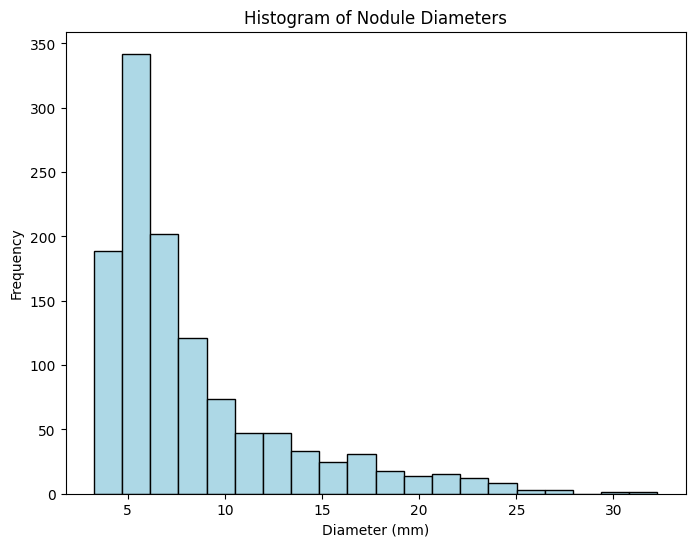

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['diameter_mm'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Diameter (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Nodule Diameters')
plt.show()

image 0


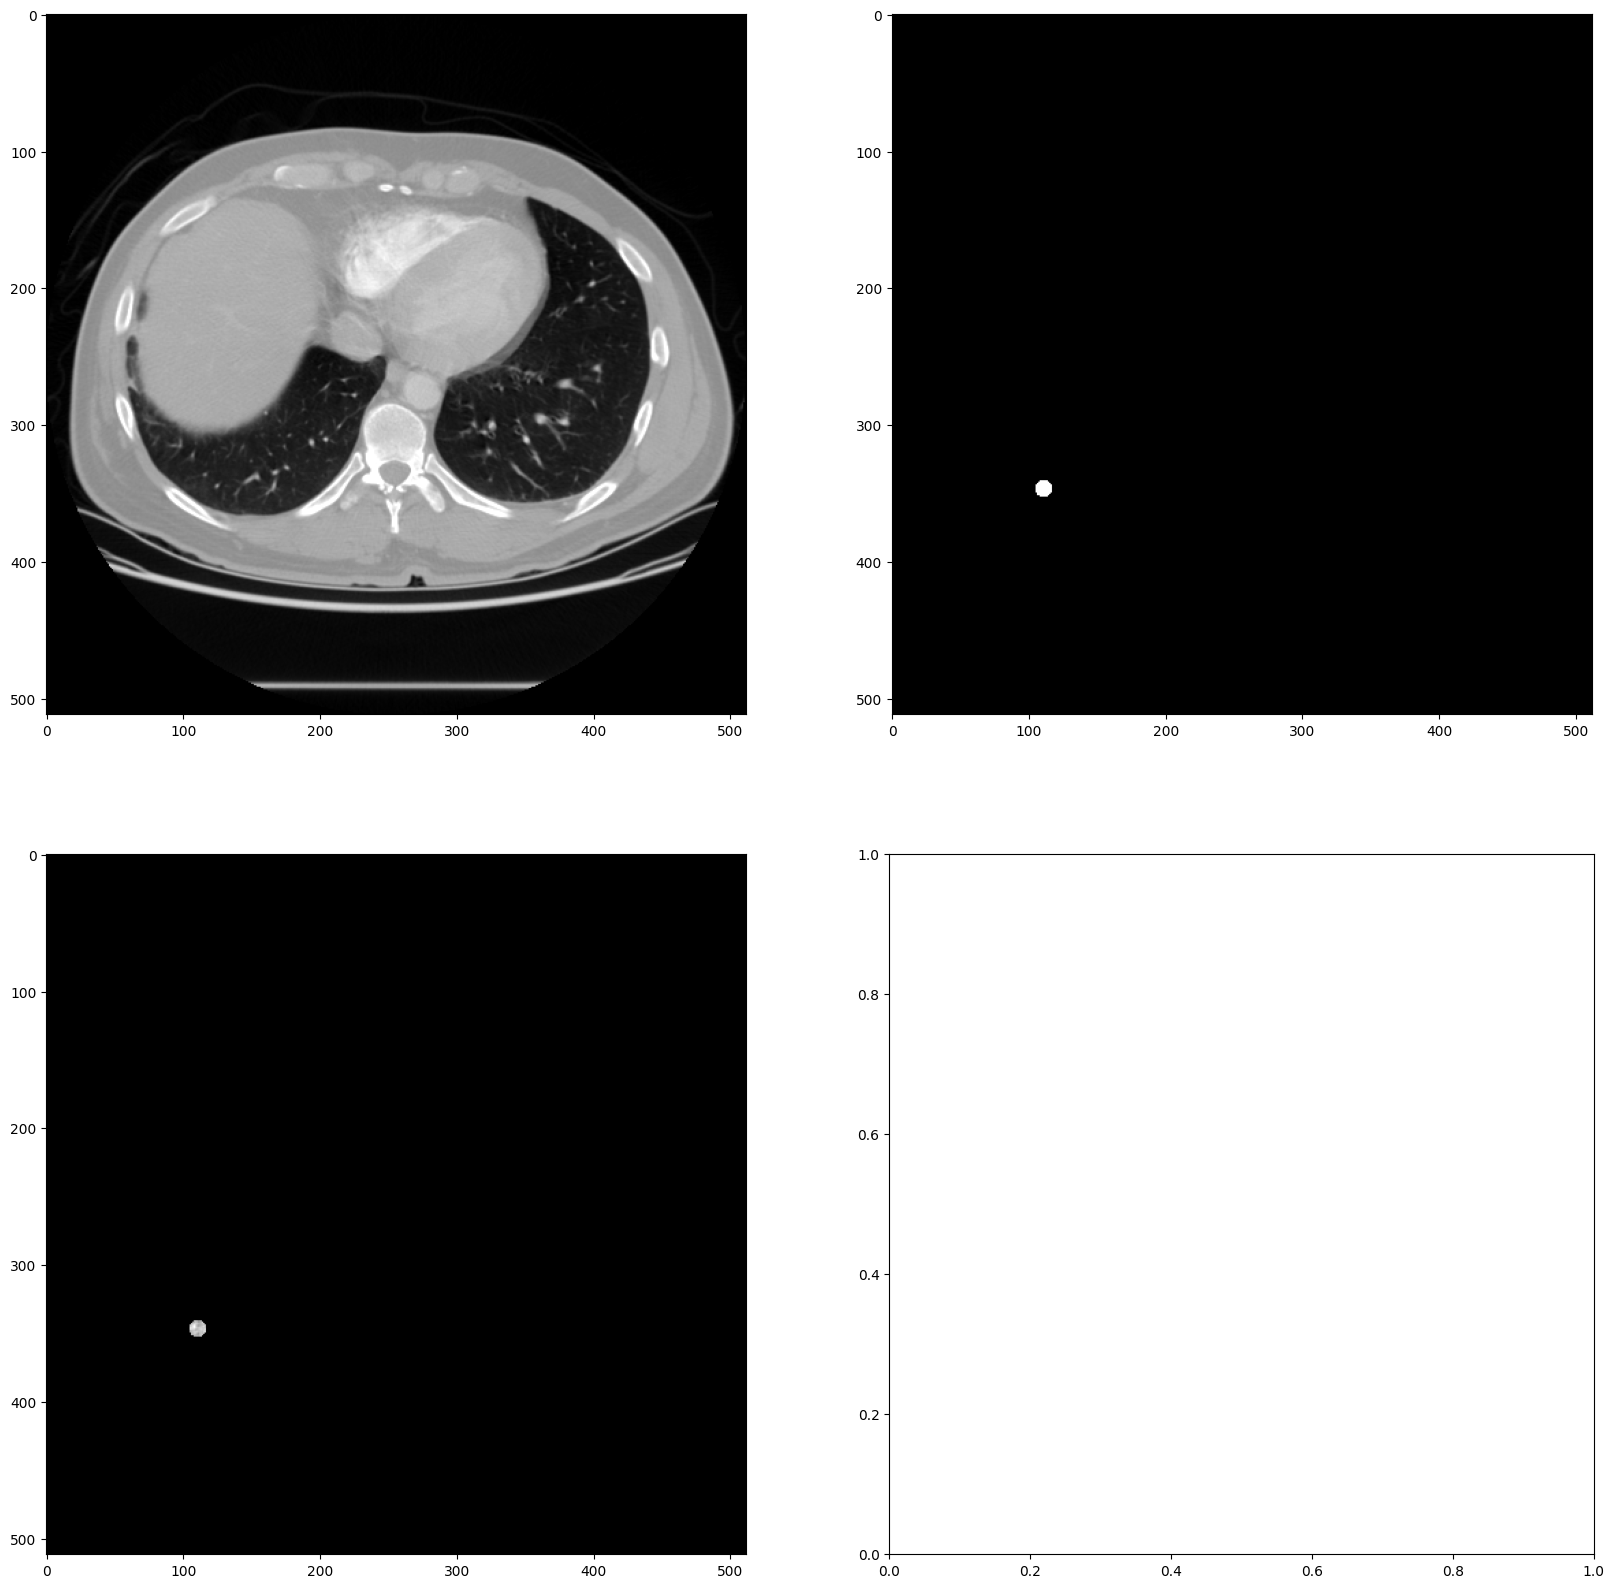

image 1


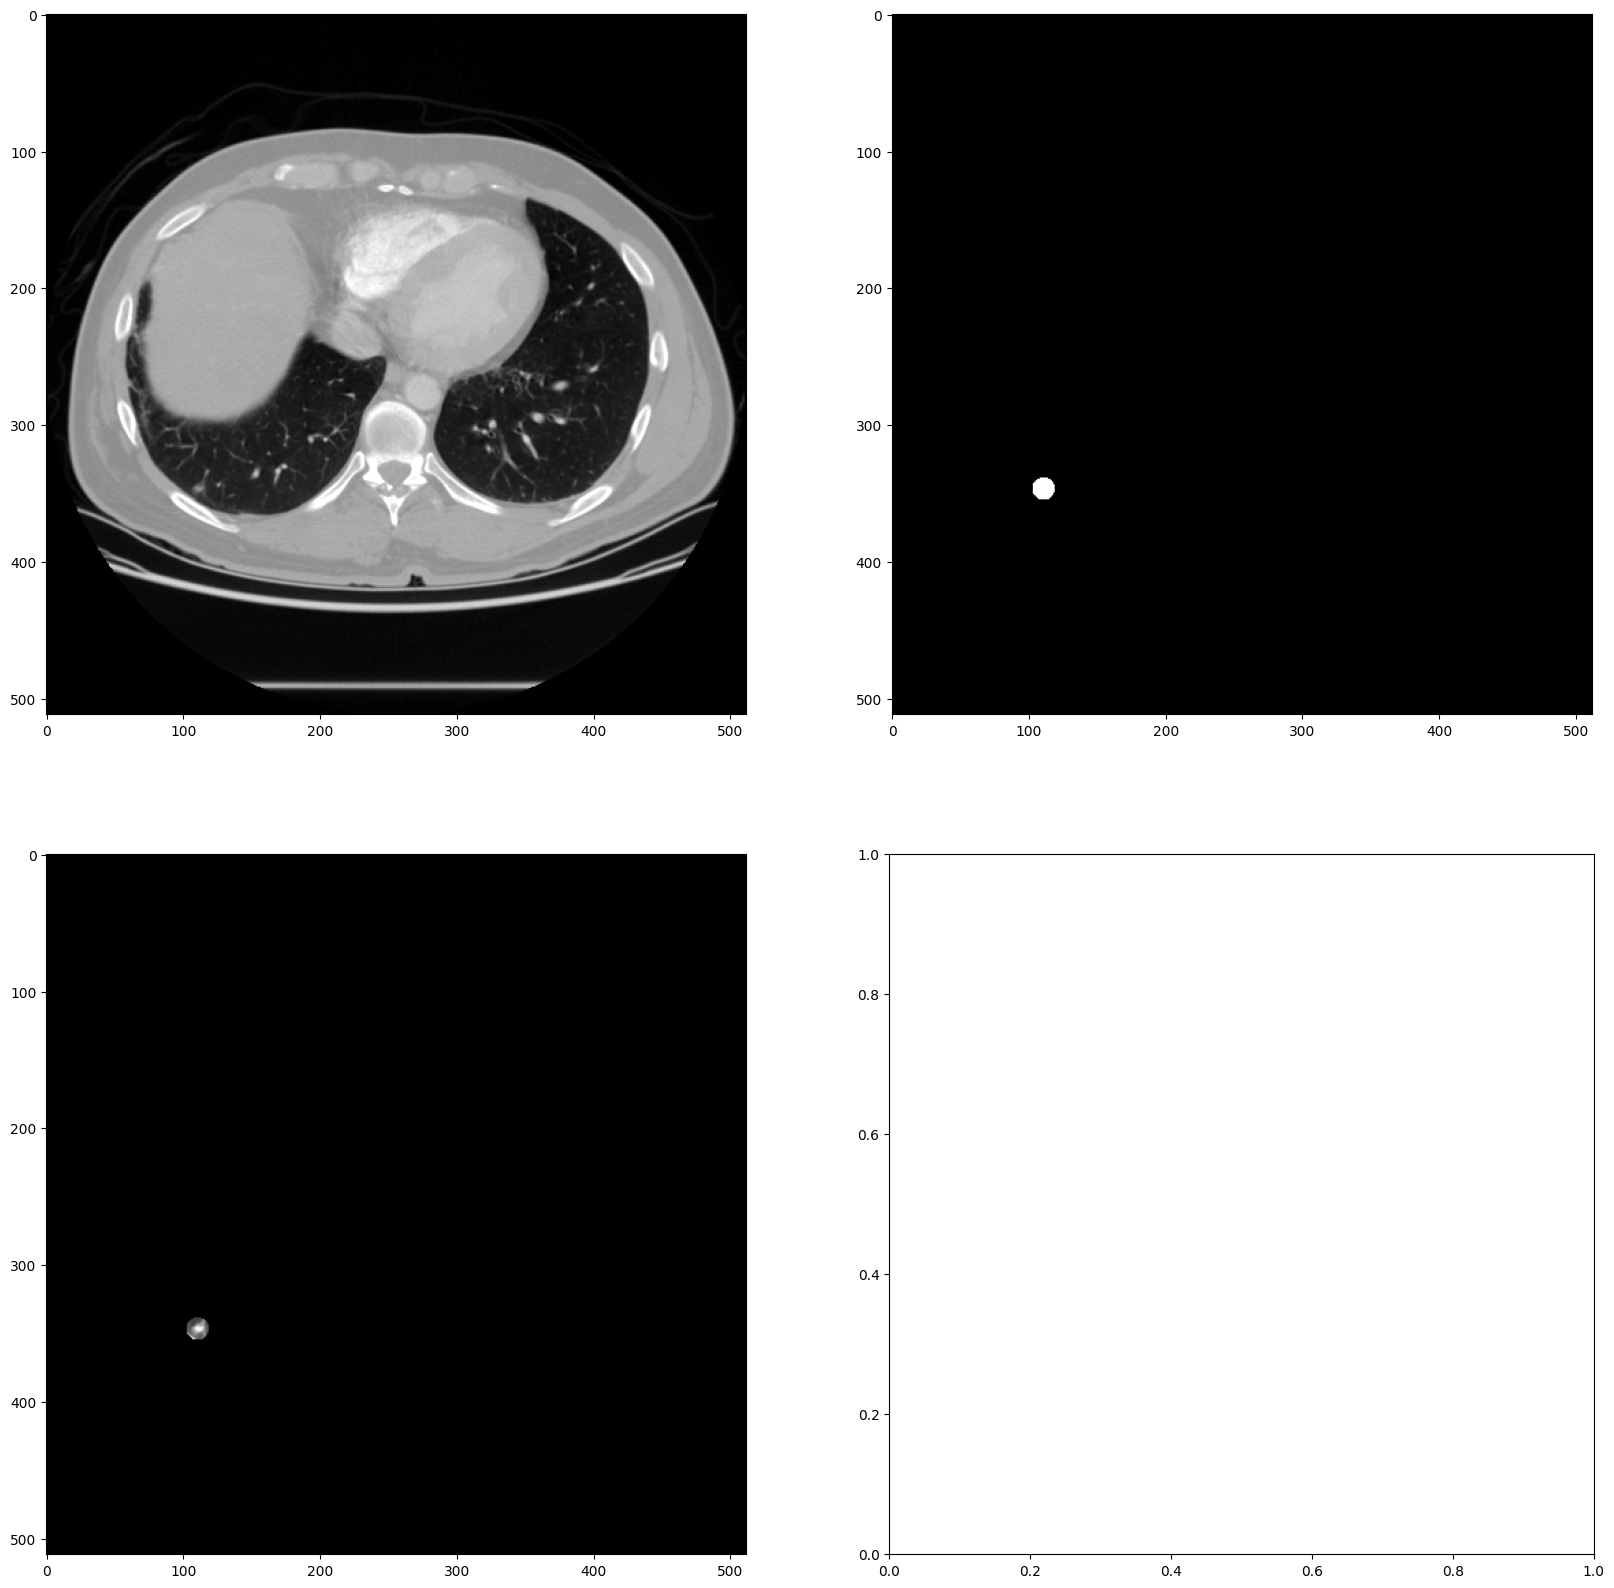

image 2


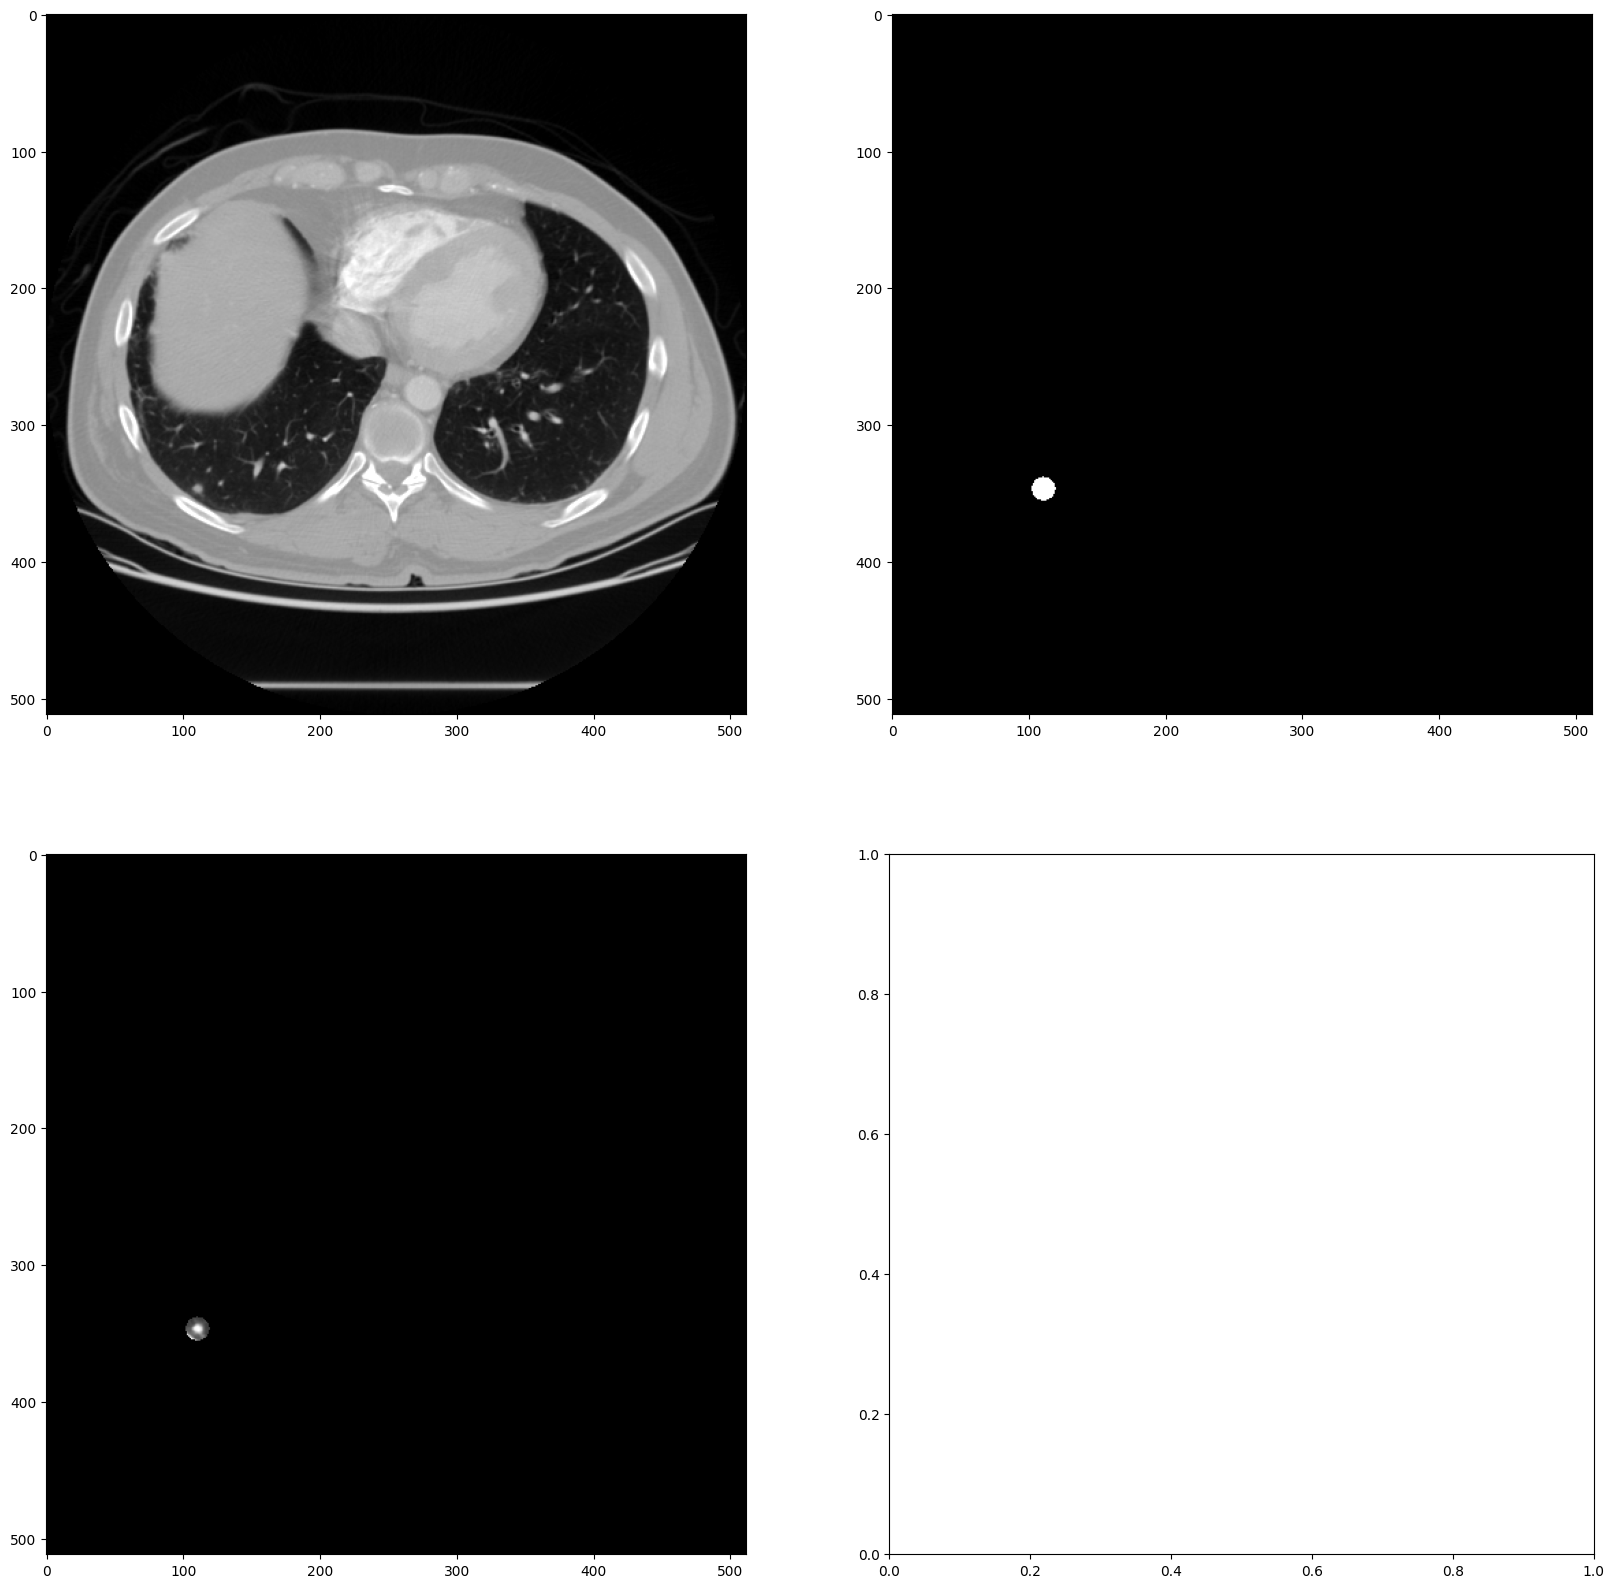

image 3


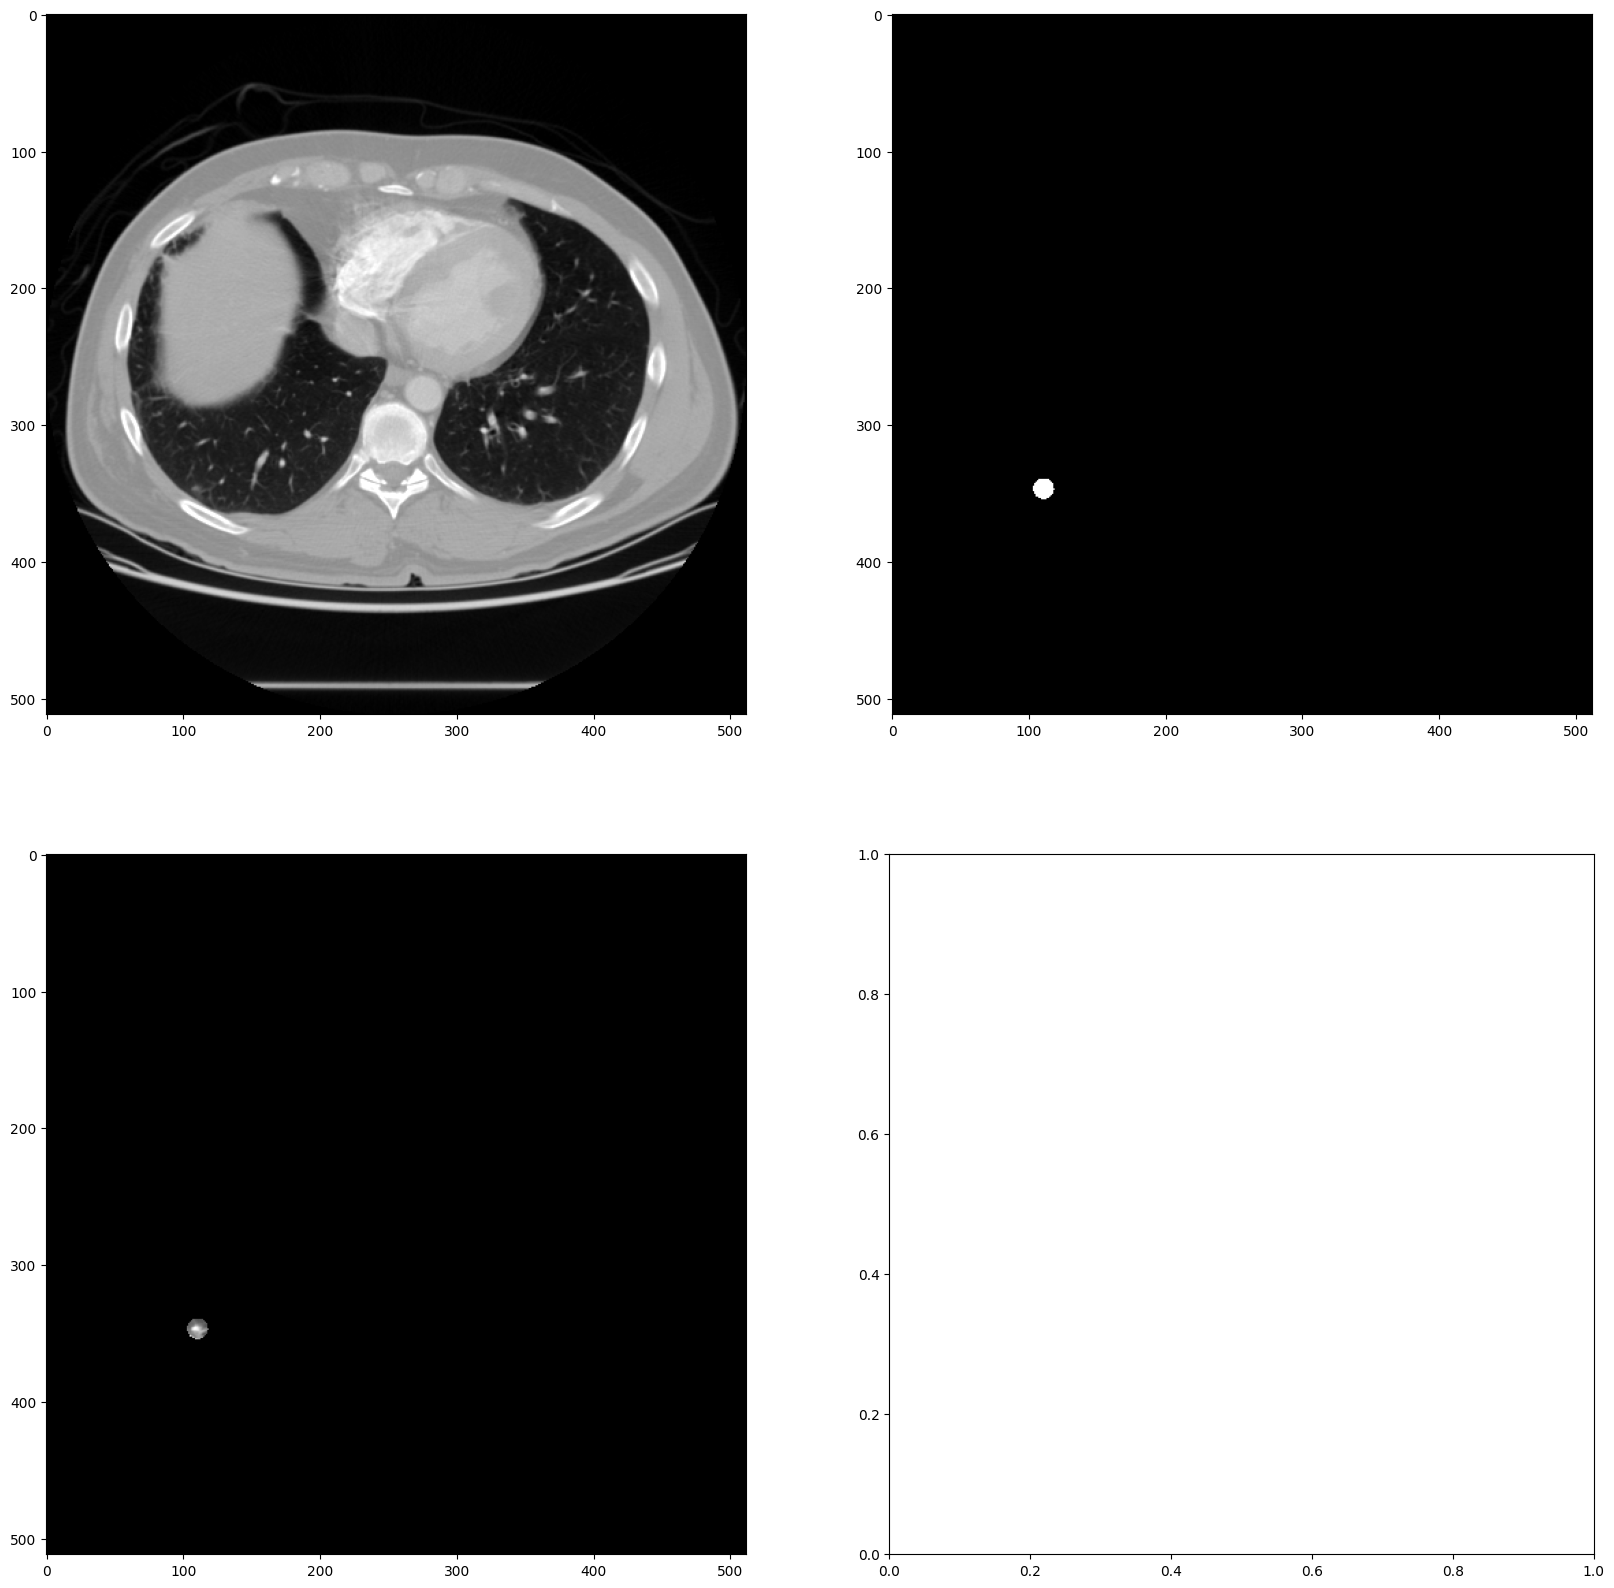

image 4


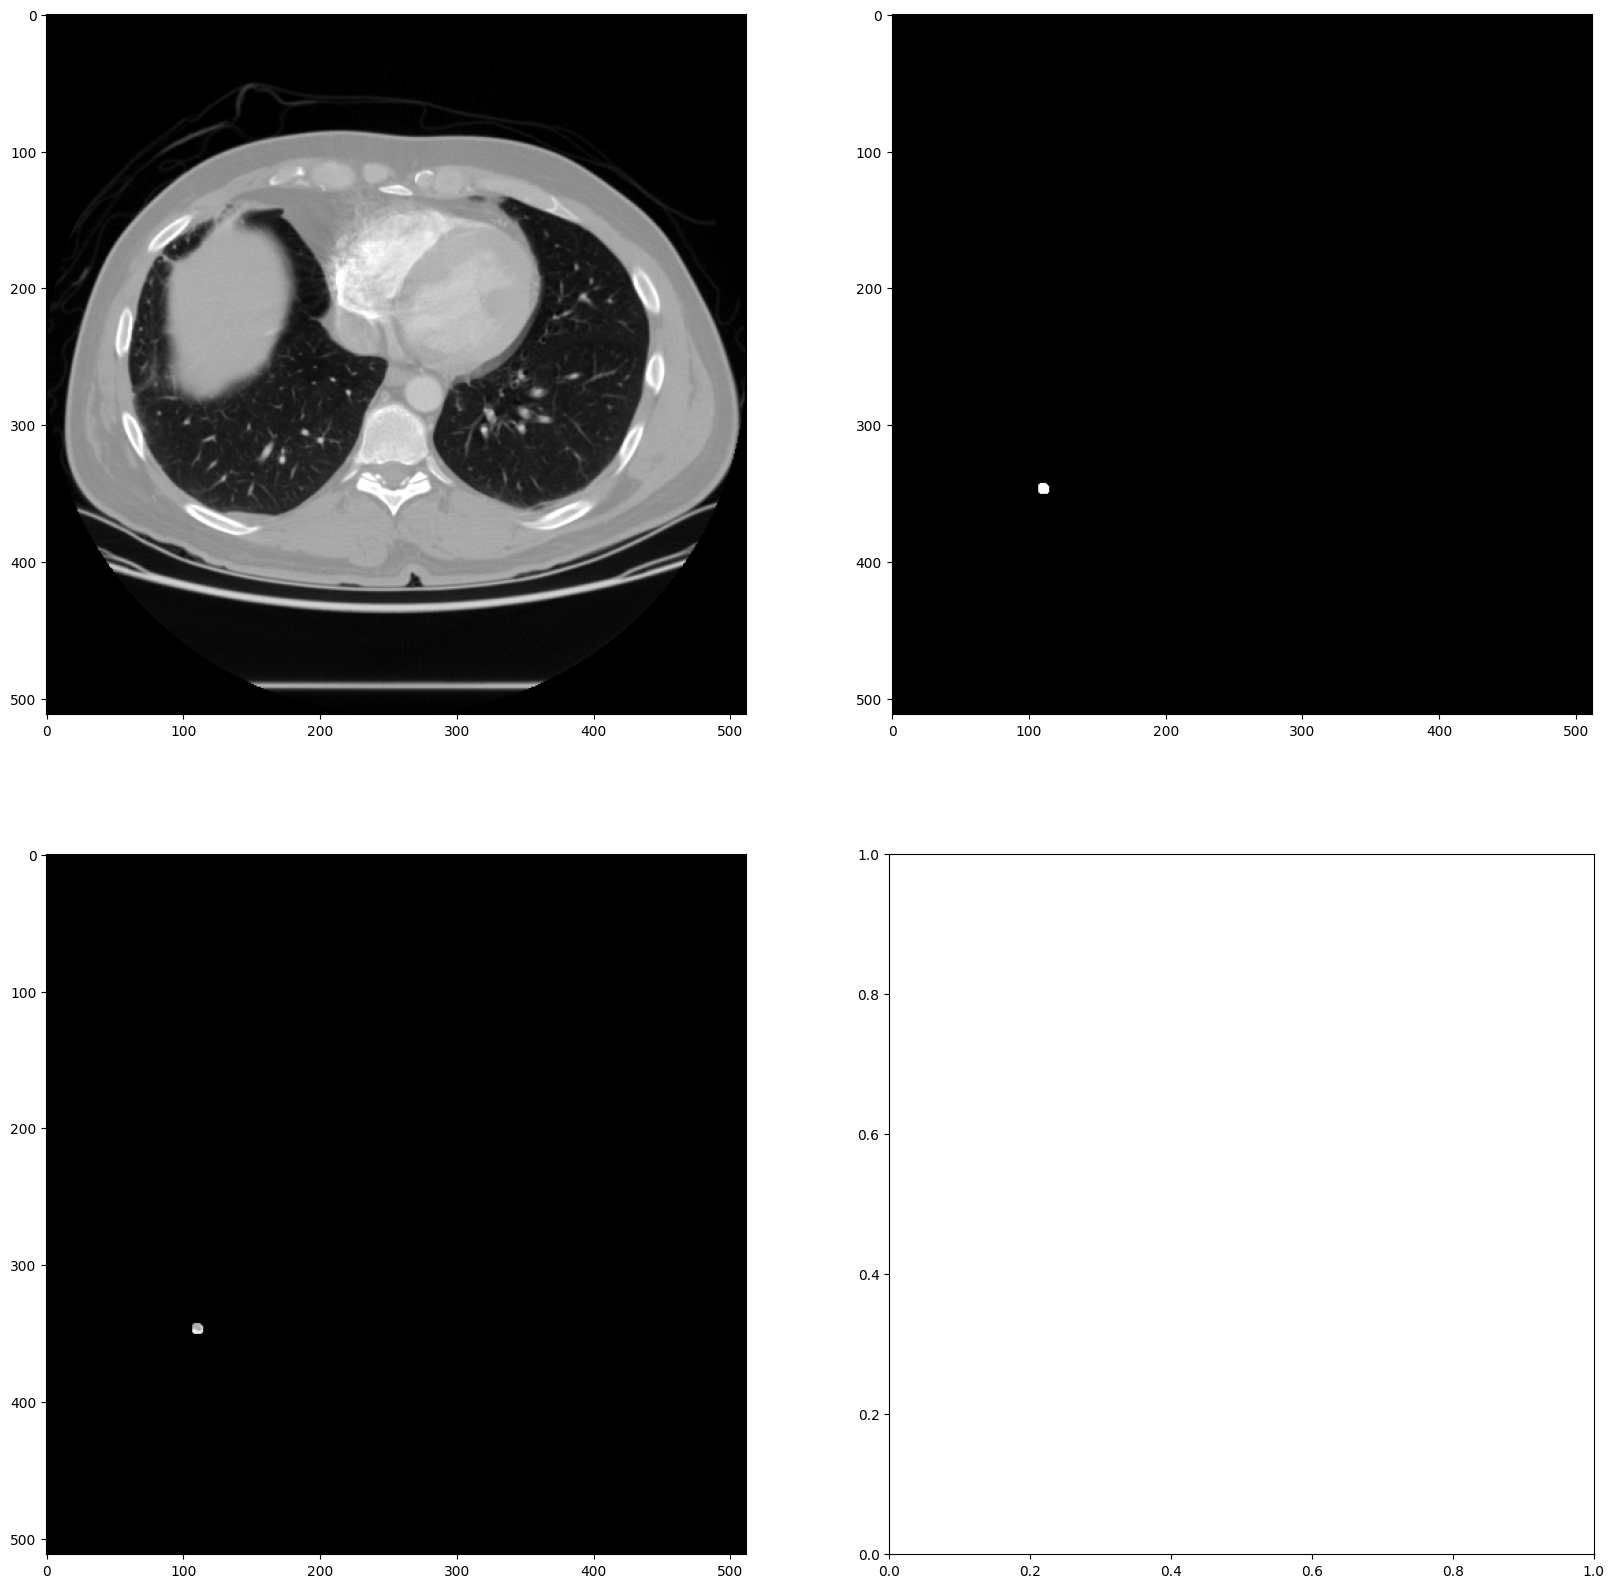

In [11]:
import matplotlib.pyplot as plt

def normalize(image):
    MIN_BOUND = -1000.0
    MAX_BOUND = 600.0
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image

id = "1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492_2_23.npy"
imgs = np.load(f"./LUNA16/images/subset0/{id}")
masks = np.load(f"./LUNA16/masks/subset0/{id}")
for i in range(len(imgs)):
    print("image %d" % i)
    fig,ax = plt.subplots(2,2,figsize=[20,20])
    ax[0,0].imshow(normalize(imgs[i]), cmap='gray')
    ax[0,1].imshow(masks[i],cmap='gray')
    ax[1,0].imshow(normalize(imgs[i])*masks[i],cmap='gray')
    plt.show()

In [4]:
file_name = "./LUNA16/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd"
itkimage = sitk.ReadImage(file_name)
ct_scan = sitk.GetArrayFromImage(itkimage)
# origin = np.array(list(reversed(itkimage.GetOrigin())))
# spacing = np.array(list(reversed(itkimage.GetSpacing())))
# canter = np.array([116.8024039,-1.291850522,-197.5054168])
# diam = 4.666322736



In [7]:
print(itkimage)

Image (000001AA208366D0)
  RTTI typeinfo:   class itk::Image<short,3>
  Reference Count: 1
  Modified Time: 1856
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1826
  UpdateMTime: 1852
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 121]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 121]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 121]
  Spacing: [0.761719, 0.761719, 2.5]
  Origin: [-198.1, -195, -335.21]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.761719 0 0
0 0.761719 0
0 0 2.5

  PointToIndexMatrix: 
1.31282 0 0
0 1.31282 0
0 0 0.4

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (000001AA0F47C250)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int6

In [6]:
print(ct_scan.shape)

(121, 512, 512)


In [2]:
file_list = os.listdir("./YOLO format/lung_ct_version_n_512.v2i.yolov8/test/images")

In [3]:
print(file_list[0])

1-3-6-1-4-1-14519-5-2-1-6279-6001-102681962408431413578140925249_121_8_png.rf.c4b7ac2a0994b9002ae66d336976ffdf.jpg


In [12]:
set_file = set()
for file in file_list:
    set_file.add(file.split("_")[0].replace("-", "."))

In [1]:
import re

# URL mẫu
url = "http://localhost:8000/images/slice_123.png"

# Sử dụng regex để trích xuất "slice_123"
match = re.search(r"slice_\d+", url)
if match:
    slice_id = match.group(0)
    print("Trích xuất:", slice_id)
else:
    print("Không tìm thấy 'slice_' trong URL")

Trích xuất: slice_123


In [14]:
for i in set_file:
    print(i)

1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949
1.3.6.1.4.1.14519.5.2.1.6279.6001.150684298696437181894923266019
1.3.6.1.4.1.14519.5.2.1.6279.6001.733642690503782454656013446707
1.3.6.1.4.1.14519.5.2.1.6279.6001.119806527488108718706404165837
1.3.6.1.4.1.14519.5.2.1.6279.6001.162845309248822193437735868939
1.3.6.1.4.1.14519.5.2.1.6279.6001.275986221854423197884953496664
1.3.6.1.4.1.14519.5.2.1.6279.6001.292057261351416339496913597985
1.3.6.1.4.1.14519.5.2.1.6279.6001.177685820605315926524514718990
1.3.6.1.4.1.14519.5.2.1.6279.6001.204802250386343794613980417281
1.3.6.1.4.1.14519.5.2.1.6279.6001.214800939017429618305208626314
1.3.6.1.4.1.14519.5.2.1.6279.6001.170921541362033046216100409521
1.3.6.1.4.1.14519.5.2.1.6279.6001.693480911433291675609148051914
1.3.6.1.4.1.14519.5.2.1.6279.6001.154837327827713479309898027966
1.3.6.1.4.1.14519.5.2.1.6279.6001.178391668569567816549737454720
1.3.6.1.4.1.14519.5.2.1.6279.6001.569096986145782511000054443951
1.3.6.1.4.1.14519.5.2.1.6

In [27]:
ids = "1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028521482602829374444_66_1137"
img_rgb = cv2.imread(f"./LUNA16/subset0_extracted/ct_images/{ids}.png")
temp = ids.split("_", 1)[0]
print(temp)
df_roi = pd.read_csv("./LUNA16/subset0_extracted/output.csv")
a = df_roi[df_roi["ID"] == f"{ids}"]
x_min, x_max, y_min, y_max = a["x_min"].iloc[0], a["x_max"].iloc[0], a["y_min"].iloc[0], a["y_max"].iloc[0]
cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), color=(0,255,0), thickness=2)
cv2.imshow("lalala", img_rgb)
cv2.waitKey(0)

1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028521482602829374444


-1

In [ ]:
ids = "1.3.6.1.4.1.14519.5.2.1.6279.6001.282512043257574309474415322775_172_749"
img_rgb = cv2.imread(f"./preprocessed_img2/{ids}.png")
temp = ids.split("_", 1)[0]
print(temp)
df_roi = pd.read_csv("./ROI_coor3.csv")
a = df_roi[df_roi["ID"] == f"{ids}"]
x_min, x_max, y_min, y_max = a["x_min"].iloc[0], a["x_max"].iloc[0], a["y_min"].iloc[0], a["y_max"].iloc[0]
cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), color=(0,255,0), thickness=2)
cv2.imshow("lalala", img_rgb)
cv2.waitKey(0)

1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028521482602829374444


-1

## Image preprocessing

In [5]:
import os

# Định nghĩa đường dẫn tới thư mục
preprocessed_img4_folder = 'preprocessed_img4'
labels3_folder = 'labels3'

# Lấy danh sách các file trong thư mục preprocessed_img4
preprocessed_files = set(os.path.splitext(f)[0] for f in os.listdir(preprocessed_img4_folder))

# Lấy danh sách các file trong thư mục labels3
label_files = set(os.path.splitext(f)[0] for f in os.listdir(labels3_folder))

# Kiểm tra các file trong preprocessed_img4 nhưng không có trong labels3
files_only_in_preprocessed = preprocessed_files - label_files

print(len(files_only_in_preprocessed))
# In ra danh sách các file (không bao gồm phần mở rộng)
for file in files_only_in_preprocessed:
    print(file)


24
1.3.6.1.4.1.14519.5.2.1.6279.6001.312127933722985204808706697221_79_862
1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689_76_179
1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689_158_176
1.3.6.1.4.1.14519.5.2.1.6279.6001.964952370561266624992539111877_194_1172
1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689_169_175
1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311_172_1160
1.3.6.1.4.1.14519.5.2.1.6279.6001.801945620899034889998809817499_180_1103
1.3.6.1.4.1.14519.5.2.1.6279.6001.964952370561266624992539111877_200_1173
1.3.6.1.4.1.14519.5.2.1.6279.6001.312127933722985204808706697221_55_863
1.3.6.1.4.1.14519.5.2.1.6279.6001.127965161564033605177803085629_111_102
1.3.6.1.4.1.14519.5.2.1.6279.6001.964952370561266624992539111877_202_1175
1.3.6.1.4.1.14519.5.2.1.6279.6001.964952370561266624992539111877_204_1174
1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689_98_178
1.3.6.1.4.1.14519.5.2.1.6279.6001.312127933722

In [6]:
import os

# Định nghĩa đường dẫn tới thư mục
preprocessed_img4_folder = 'preprocessed_img4'
labels3_folder = 'labels3'

# Lấy danh sách các file trong thư mục preprocessed_img4
preprocessed_files = set(os.path.splitext(f)[0] for f in os.listdir(preprocessed_img4_folder))

# Lấy danh sách các file trong thư mục labels3
label_files = set(os.path.splitext(f)[0] for f in os.listdir(labels3_folder))

# Kiểm tra các file trong preprocessed_img4 nhưng không có trong labels3
files_only_in_preprocessed = preprocessed_files - label_files

# In ra số lượng và danh sách các file cần xóa
print(f"Số lượng tệp cần xóa: {len(files_only_in_preprocessed)}")
for file in files_only_in_preprocessed:
    # Tạo đường dẫn đầy đủ của file cần xóa
    file_path = os.path.join(preprocessed_img4_folder, file + os.path.splitext(next(f for f in os.listdir(preprocessed_img4_folder) if os.path.splitext(f)[0] == file))[1])
    
    # Kiểm tra và xóa tệp
    if os.path.isfile(file_path):
        os.remove(file_path)
        print(f"Đã xóa: {file_path}")
    else:
        print(f"Không tìm thấy tệp: {file_path}")


Số lượng tệp cần xóa: 24
Đã xóa: preprocessed_img4\1.3.6.1.4.1.14519.5.2.1.6279.6001.312127933722985204808706697221_79_862.png
Đã xóa: preprocessed_img4\1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689_76_179.png
Đã xóa: preprocessed_img4\1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689_158_176.png
Đã xóa: preprocessed_img4\1.3.6.1.4.1.14519.5.2.1.6279.6001.964952370561266624992539111877_194_1172.png
Đã xóa: preprocessed_img4\1.3.6.1.4.1.14519.5.2.1.6279.6001.148447286464082095534651426689_169_175.png
Đã xóa: preprocessed_img4\1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311_172_1160.png
Đã xóa: preprocessed_img4\1.3.6.1.4.1.14519.5.2.1.6279.6001.801945620899034889998809817499_180_1103.png
Đã xóa: preprocessed_img4\1.3.6.1.4.1.14519.5.2.1.6279.6001.964952370561266624992539111877_200_1173.png
Đã xóa: preprocessed_img4\1.3.6.1.4.1.14519.5.2.1.6279.6001.312127933722985204808706697221_55_863.png
Đã xóa: preprocessed_img4\1.3.6.1.4.1.14519.5.2

In [28]:
df_roi = pd.read_csv("./ROI_coor4.csv")
df_roi = df_roi[(df_roi['x_min'] >= 0) & (df_roi['x_max'] >= 0) & (df_roi['y_min'] >= 0) & (df_roi['y_max'] >= 0)]
df_roi.info()
df_roi.to_csv("ROI_coor4.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 0 to 1185
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x_min   1162 non-null   int64 
 1   x_max   1162 non-null   int64 
 2   y_min   1162 non-null   int64 
 3   y_max   1162 non-null   int64 
 4   ID      1162 non-null   object
dtypes: int64(4), object(1)
memory usage: 54.5+ KB


In [29]:
df = pd.read_csv("./ROI_coor4.csv")
ids = df["ID"].to_numpy()

file_list = os.listdir("./preprocessed_img3")
for i in tqdm(file_list):
    file_name = i.rsplit(".", 1)[0]
    if file_name not in ids:
        os.remove(f"./preprocessed_img3/{i}")

100%|██████████| 1186/1186 [00:00<00:00, 14028.56it/s]


In [9]:
def yolo_format_calculate(x_min, x_max, y_min, y_max, width, height):
    box_width = x_max - x_min
    box_height = y_max - y_min
    x_center = x_min + (box_width/2)
    y_center = y_min + (box_height/2)

    return x_center/width, y_center/height, box_width/width, box_height/height

In [8]:
df_roi = pd.read_csv("./ROI_coor2.csv")
for idx, row in df_roi.iterrows():
    x_min = row["x_min"].iloc[0]
    x_max = row["x_max"].iloc[0]
    y_min = row["y_min"].iloc[0]
    y_max = row["y_max"].iloc[0]
    roi_id = row["ID"].iloc[0]
    
    x_center, y_center, box_w, box_h = yolo_format_calculate(x_min, x_max, y_min, x_max)
    
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x_min   1162 non-null   int64 
 1   x_max   1162 non-null   int64 
 2   y_min   1162 non-null   int64 
 3   y_max   1162 non-null   int64 
 4   ID      1162 non-null   object
dtypes: int64(4), object(1)
memory usage: 45.5+ KB


In [23]:
# Bước 1: Đọc file CSV
df = pd.read_csv('./ROI_coor3.csv')

# Bước 2: Duyệt qua từng dòng và cập nhật giá trị
for index, row in df.iterrows():
    x_min = row['x_min']
    x_max = row['x_max']
    y_min = row['y_min']
    y_max = row['y_max']
    
    # Tính tọa độ tâm O(x, y)
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    
    # Cập nhật lại x_min, x_max, y_min, y_max với d/2
    x_min_updated = x_center - (x_max - x_min) / 4  # (d / 2) = (x_max - x_min) / 2, lấy d/4 để điều chỉnh
    x_max_updated = x_center + (x_max - x_min) / 4
    y_min_updated = y_center - (y_max - y_min) / 4
    y_max_updated = y_center + (y_max - y_min) / 4
    
    # Cập nhật giá trị vào dataframe
    df.at[index, 'x_min'] = int(x_min_updated)
    df.at[index, 'x_max'] = int(x_max_updated)
    df.at[index, 'y_min'] = int(y_min_updated)
    df.at[index, 'y_max'] = int(y_max_updated)

# Bước 3: Xuất ra file CSV mới
df.to_csv('ROI_coor3_updated.csv', index=False)

print("Đã cập nhật và lưu vào file ROI_coor3_updated.csv")

Đã cập nhật và lưu vào file ROI_coor3_updated.csv


## Predict

In [2]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
import os
import torchvision
import matplotlib.pyplot as plt
import warnings
from PIL import Image, ImageDraw
from ultralytics import YOLO
import cv2
import numpy as np
import streamlit as st
import pandas as pd
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from pathlib import Path

d:\Code\Python Code\CT552\CT552_vm\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
warnings.filterwarnings("ignore")

COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

id2label = {0: 'lung_ct_2', 1: 'nodule'}

In [22]:
PREDICT_SLICE_PNG_DIR = Path("detr_predict_image_3")
PREDICT_SLICE_PNG_DIR.mkdir(exist_ok=True)
YOLO_PREDICT_SLICE_PNG_DIR = Path("yolo_predict_image_2")
YOLO_PREDICT_SLICE_PNG_DIR.mkdir(exist_ok=True)
FRCNN_PREDICT_SLICE_PNG_DIR = Path("frcnn_predict_image_5")
FRCNN_PREDICT_SLICE_PNG_DIR.mkdir(exist_ok=True)

In [5]:
class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, img_folder, processor):
        ann_file = os.path.join(img_folder, "_annotations.coco.json")
        super(CocoDetection, self).__init__(img_folder, ann_file)
        self.processor = processor

    def __getitem__(self, idx):
        img, target = super(CocoDetection, self).__getitem__(idx)

        image_id = self.ids[idx]
        target = {'image_id': image_id, 'annotations': target}
        encoding = self.processor(images=img, annotations=target, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()
        target = encoding["labels"][0]

        return pixel_values, target
    
def apply_nms(orig_prediction, iou_thresh=0.3):
    
    # torchvision returns the indices of the bboxes to keep
    keep = torchvision.ops.nms(orig_prediction['boxes'], orig_prediction['scores'], iou_thresh)
    
    final_prediction = orig_prediction
    final_prediction['boxes'] = final_prediction['boxes'][keep]
    final_prediction['scores'] = final_prediction['scores'][keep]
    final_prediction['labels'] = final_prediction['labels'][keep]
    
    return final_prediction

def plot_results(pil_img, scores, labels, boxes, model="yolo"):
    # Tạo figure và axes cho matplotlib
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.imshow(pil_img)

    # Lặp qua các bounding box, nhãn và điểm số để vẽ
    colors = COLORS * 100  # Nhân đôi màu để có đủ màu sắc nếu cần
    for score, label, (xmin, ymin, xmax, ymax), c in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        # Vẽ khung hình chữ nhật
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                       fill=False, edgecolor=c, linewidth=3))
        
        # Thêm nhãn và điểm số
        if model == "yolo":
            text = f'{id2label[1]}: {score:0.2f}'
        else:
            text = f'{id2label[label]}: {score:0.2f}'
        # ax.text(xmin, ymin, text, fontsize=15, color='black', bbox=dict(facecolor='yellow', alpha=0.5))
    
    # Tắt hiển thị các trục
    ax.axis('off')
    
    # Hiển thị hình ảnh trên Streamlit
    st.pyplot(fig)

In [ ]:
processor = DetrImageProcessor.from_pretrained(r"D:\Code\Python Code\CT552\DETR results\runs_detr_R50_DC5\checkpoint-15150")
test_dataset = CocoDetection(img_folder=r"D:\Code\Python Code\CT552\COCO format\lung_ct_version_n_512.v2i.coco\test", processor=processor)
cats = test_dataset.coco.cats
id2label = {k: v["name"] for k, v in cats.items()}
model = DetrForObjectDetection.from_pretrained(r"D:\Code\Python Code\CT552\DETR results\runs_detr_R50_DC5\checkpoint-15150", id2label=id2label, ignore_mismatched_sizes=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [8]:
YOLO_model = YOLO(r"D:\Code\Python Code\CT552\YOLO results\runs_yolov8x_512_new\train\weights\best.pt")

In [ ]:
FRCNN_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
in_features = FRCNN_model.roi_heads.box_predictor.cls_score.in_features
FRCNN_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2) 
checkpoint = torch.load(r"D:\Code\Python Code\CT552\FRCNN result\frcnn_model_maybe_final.pth", map_location=torch.device('cpu'))
FRCNN_model.load_state_dict(checkpoint['model_state_dict'])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
FRCNN_model.to(device)
FRCNN_model.eval()

DETR

In [ ]:
df_roi = pd.read_csv("./ROI_coor4.csv")
for file in tqdm(os.listdir(path=r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images")):
    img_path = os.path.join(r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images", file)
    roi_id = file.rsplit("_", 1)[0].replace("-", ".")
    a = df_roi[df_roi["ID"] == f"{roi_id}"]
    x_min, x_max, y_min, y_max = a["x_min"].iloc[0], a["x_max"].iloc[0], a["y_min"].iloc[0], a["y_max"].iloc[0]
    img = cv2.imread(img_path)
    
    img1 = cv2.resize(img, (512, 512))
    cv2.rectangle(img1, (x_min, y_min), (x_max, y_max), color=(0,255,0), thickness=2)
    encoding = processor(images=img1, return_tensors="pt")
    pixel_values = encoding["pixel_values"].squeeze()
    pixel_values = pixel_values.unsqueeze(0)
    with torch.no_grad():
        outputs = model(pixel_values=pixel_values, pixel_mask=None)
    postprocessed_outputs = processor.post_process_object_detection(outputs, target_sizes=[(512, 512)], threshold=0.25)
    results = postprocessed_outputs[0]
    if results["boxes"].tolist():
        for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
            x_min_detr, y_min_detr, x_max_detr, y_max_detr = box.tolist()
            cv2.rectangle(img1, (int(x_min_detr), int(y_min_detr)), (int(x_max_detr), int(y_max_detr)), color=(0,0,255), thickness=2)
    png_path = PREDICT_SLICE_PNG_DIR / f"{roi_id}.png"
    cv2.imwrite(png_path, img1)

100%|██████████| 228/228 [07:09<00:00,  1.88s/it]


In [10]:
df_roi = pd.read_csv("./ROI_coor4.csv")
times = 0
for file in tqdm(os.listdir(path=r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images")):
    img_path = os.path.join(r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images", file)
    roi_id = file.rsplit("_", 1)[0].replace("-", ".")
    a = df_roi[df_roi["ID"] == f"{roi_id}"]
    x_min, x_max, y_min, y_max = a["x_min"].iloc[0], a["x_max"].iloc[0], a["y_min"].iloc[0], a["y_max"].iloc[0]
    img = cv2.imread(img_path)
    
    img1 = cv2.resize(img, (512, 512))
    cv2.rectangle(img1, (x_min, y_min), (x_max, y_max), color=(0,255,0), thickness=2)
    encoding = processor(images=img1, return_tensors="pt")
    pixel_values = encoding["pixel_values"].squeeze()
    pixel_values = pixel_values.unsqueeze(0)
    start_time = time.time()
    with torch.no_grad():
        outputs = model(pixel_values=pixel_values, pixel_mask=None)
    postprocessed_outputs = processor.post_process_object_detection(outputs, target_sizes=[(512, 512)], threshold=0.25)
    end_time = time.time()
    times += (end_time - start_time)
    # results = postprocessed_outputs[0]
    # if results["boxes"].tolist():
    #     for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    #         x_min_detr, y_min_detr, x_max_detr, y_max_detr = box.tolist()
    #         cv2.rectangle(img1, (int(x_min_detr), int(y_min_detr)), (int(x_max_detr), int(y_max_detr)), color=(0,0,255), thickness=2)
    # png_path = PREDICT_SLICE_PNG_DIR / f"{roi_id}.png"
    # cv2.imwrite(png_path, img1)

100%|██████████| 228/228 [05:11<00:00,  1.36s/it]


In [12]:
print(times/228)

1.315803077137261


YOLO

In [ ]:
df_roi = pd.read_csv("./ROI_coor4.csv")
for file in tqdm(os.listdir(path=r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images")):
    img_path = os.path.join(r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images", file)
    roi_id = file.rsplit("_", 1)[0].replace("-", ".")
    a = df_roi[df_roi["ID"] == f"{roi_id}"]
    x_min, x_max, y_min, y_max = a["x_min"].iloc[0], a["x_max"].iloc[0], a["y_min"].iloc[0], a["y_max"].iloc[0]
    img = cv2.imread(img_path)
    
    img1 = cv2.resize(img, (512, 512))
    cv2.rectangle(img1, (x_min, y_min), (x_max, y_max), color=(0,255,0), thickness=2)
    box = YOLO_model(img1)
    if len(box[0].boxes.xyxy) != 0:
        for box in box[0].boxes.xyxy:
            x_min_yolo, y_min_yolo, x_max_yolo, y_max_yolo = box.tolist()
            cv2.rectangle(img1, (int(x_min_yolo), int(y_min_yolo)), (int(x_max_yolo), int(y_max_yolo)), color=(0,0,255), thickness=2)
    png_path = YOLO_PREDICT_SLICE_PNG_DIR / f"{roi_id}.png"
    cv2.imwrite(png_path, img1)

In [ ]:
df_roi = pd.read_csv("./ROI_coor4.csv")
time2 = 0
for file in tqdm(os.listdir(path=r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images")):
    img_path = os.path.join(r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images", file)
    roi_id = file.rsplit("_", 1)[0].replace("-", ".")
    a = df_roi[df_roi["ID"] == f"{roi_id}"]
    x_min, x_max, y_min, y_max = a["x_min"].iloc[0], a["x_max"].iloc[0], a["y_min"].iloc[0], a["y_max"].iloc[0]
    img = cv2.imread(img_path)
    
    img1 = cv2.resize(img, (512, 512))
    cv2.rectangle(img1, (x_min, y_min), (x_max, y_max), color=(0,255,0), thickness=2)
    start_time = time.time()
    box = YOLO_model(img1)
    end_time = time.time()
    time2 += (end_time - start_time)
    # if len(box[0].boxes.xyxy) != 0:
    #     for box in box[0].boxes.xyxy:
    #         x_min_yolo, y_min_yolo, x_max_yolo, y_max_yolo = box.tolist()
    #         cv2.rectangle(img1, (int(x_min_yolo), int(y_min_yolo)), (int(x_max_yolo), int(y_max_yolo)), color=(0,0,255), thickness=2)
    # png_path = YOLO_PREDICT_SLICE_PNG_DIR / f"{roi_id}.png"
    # cv2.imwrite(png_path, img1)

In [15]:
print(time2/228)

1.4248210170812774


Faster R-CNN

In [24]:
df_roi = pd.read_csv("./ROI_coor4.csv")
for file in tqdm(os.listdir(path=r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images")):
    img_path = os.path.join(r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images", file)
    roi_id = file.rsplit("_", 1)[0].replace("-", ".")
    a = df_roi[df_roi["ID"] == f"{roi_id}"]
    x_min, x_max, y_min, y_max = a["x_min"].iloc[0], a["x_max"].iloc[0], a["y_min"].iloc[0], a["y_max"].iloc[0]
    img = cv2.imread(img_path)
    
    img1 = cv2.resize(img, (512, 512))
    img2 = torch.from_numpy(img1.transpose(2, 0, 1))
    img2 = img2.float().div(255)
    cv2.rectangle(img1, (x_min, y_min), (x_max, y_max), color=(0,255,0), thickness=2)
    with torch.no_grad():
        prediction = FRCNN_model([img2])[0]
    prediction = apply_nms(prediction)
    score_threshold = 0.1

    # lọc các box, label và score với điều kiện score > 0.1
    filtered_indices = prediction["scores"] > score_threshold
    filtered_boxes = prediction["boxes"][filtered_indices]
    filtered_labels = prediction["labels"][filtered_indices]
    filtered_scores = prediction["scores"][filtered_indices]

    # kết quả sau khi lọc
    filtered_data = {
        "boxes": filtered_boxes,
        "labels": filtered_labels,
        "scores": filtered_scores
    }
    result = filtered_data["boxes"]
    for box in result:
        x_min_frcnn, y_min_frcnn, x_max_frcnn, y_max_frcnn = box.tolist()
        cv2.rectangle(img1, (int(x_min_frcnn), int(y_min_frcnn)), (int(x_max_frcnn), int(y_max_frcnn)), color=(0,0,255), thickness=2)
    png_path = FRCNN_PREDICT_SLICE_PNG_DIR / f"{roi_id}.png"
    cv2.imwrite(png_path, img1)

100%|██████████| 228/228 [12:27<00:00,  3.28s/it]


In [16]:
df_roi = pd.read_csv("./ROI_coor4.csv")
time3 = 0
for file in tqdm(os.listdir(path=r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images")):
    img_path = os.path.join(r"D:\Code\Python Code\CT552\YOLO format\lung_ct_version_n_512.v2i.yolov8\test\images", file)
    roi_id = file.rsplit("_", 1)[0].replace("-", ".")
    a = df_roi[df_roi["ID"] == f"{roi_id}"]
    x_min, x_max, y_min, y_max = a["x_min"].iloc[0], a["x_max"].iloc[0], a["y_min"].iloc[0], a["y_max"].iloc[0]
    img = cv2.imread(img_path)
    
    img1 = cv2.resize(img, (512, 512))
    img2 = torch.from_numpy(img1.transpose(2, 0, 1))
    img2 = img2.float().div(255)
    cv2.rectangle(img1, (x_min, y_min), (x_max, y_max), color=(0,255,0), thickness=2)
    start_time = time.time()
    with torch.no_grad():
        prediction = FRCNN_model([img2])[0]
    prediction = apply_nms(prediction)
    end_time = time.time()
    time3 += (end_time - start_time)
    score_threshold = 0.1

    # lọc các box, label và score với điều kiện score > 0.1
    filtered_indices = prediction["scores"] > score_threshold
    filtered_boxes = prediction["boxes"][filtered_indices]
    filtered_labels = prediction["labels"][filtered_indices]
    filtered_scores = prediction["scores"][filtered_indices]

    # kết quả sau khi lọc
    filtered_data = {
        "boxes": filtered_boxes,
        "labels": filtered_labels,
        "scores": filtered_scores
    }
    result = filtered_data["boxes"]
    # for box in result:
    #     x_min_frcnn, y_min_frcnn, x_max_frcnn, y_max_frcnn = box.tolist()
    #     cv2.rectangle(img1, (int(x_min_frcnn), int(y_min_frcnn)), (int(x_max_frcnn), int(y_max_frcnn)), color=(0,0,255), thickness=2)
    # png_path = FRCNN_PREDICT_SLICE_PNG_DIR / f"{roi_id}.png"
    # cv2.imwrite(png_path, img1)

100%|██████████| 228/228 [11:19<00:00,  2.98s/it]


In [18]:
print(time3/228)

2.969382775457282


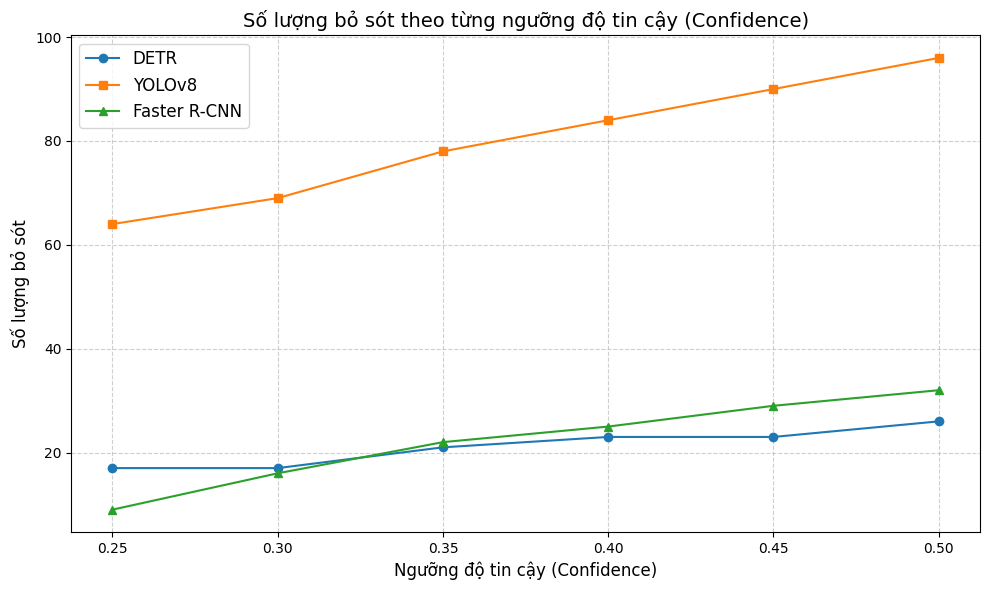

In [10]:
import matplotlib.pyplot as plt

# Dữ liệu số lượng bỏ sót theo từng conf
conf_values = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
detr_misses = [17, 17, 21, 23, 23, 26]
yolo_misses = [64, 69, 78, 84, 90, 96]
frcnn_misses = [9, 16, 22, 25, 29, 32]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

plt.plot(conf_values, detr_misses, marker='o', label='DETR')
plt.plot(conf_values, yolo_misses, marker='s', label='YOLOv8')
plt.plot(conf_values, frcnn_misses, marker='^', label='Faster R-CNN')

# Cài đặt trục và nhãn
plt.title('Số lượng bỏ sót theo từng ngưỡng độ tin cậy (Confidence)', fontsize=14)
plt.xlabel('Ngưỡng độ tin cậy (Confidence)', fontsize=12)
plt.ylabel('Số lượng bỏ sót', fontsize=12)
plt.xticks(conf_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()
